In [1]:
# Authors: Jeroen BUil
# License: BSD-3-Clause

In [2]:
import glob as glob 
import numpy as np
# import matplotlib.pyplot as plt
import mne

from deegtal_coding_task.config import *
# from deegtal_coding_task.dimensionality_reduction import get_tsne_df, plot_dim_reduction


2024-10-22 11:51:46.162 | INFO     | deegtal_coding_task.config:<module>:11 - PROJ_ROOT path is: C:\Users\buil003\Documents\Code\deegtal_coding_task


In [3]:
folder_raw_group_1 = RAW_DATA_DIR / 'Group1'
folder_raw_group_2 = RAW_DATA_DIR / 'Group2'

files_raw_group_1 = list(folder_raw_group_1.glob('*.edf'))
files_raw_group_2 = list(folder_raw_group_2.glob('*.edf'))

files_raw = [files_raw_group_1, files_raw_group_2]
print(files_raw[0], '\n', files_raw[1])


[WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_1.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_2.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_3.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_4.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_5.edf')] 
 [WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_1.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_2.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_3.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_4.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_5.edf')]


In [24]:
raw = mne.io.read_raw_edf(files_raw_group_2[4])
print(raw)
print(raw.info)

Extracting EDF parameters from C:\Users\buil003\Documents\Code\deegtal_coding_task\data\raw\Group2\2_5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | 2_5.edf, 36 x 346500 (1386.0 s), ~32 kB, data not loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2013-01-01 00:00:00 UTC
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>


In [17]:
raw.info.ch_names

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\buil003\AppData\Local\Temp\ipykernel_19864\3753987916.py:15: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
c:\Users\buil003\Documents\Code\deegtal_coding_task\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\buil003\AppData\Local\Temp\ipykernel_19864\3753987916.py:16: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  raw.plot(n_channels=36)


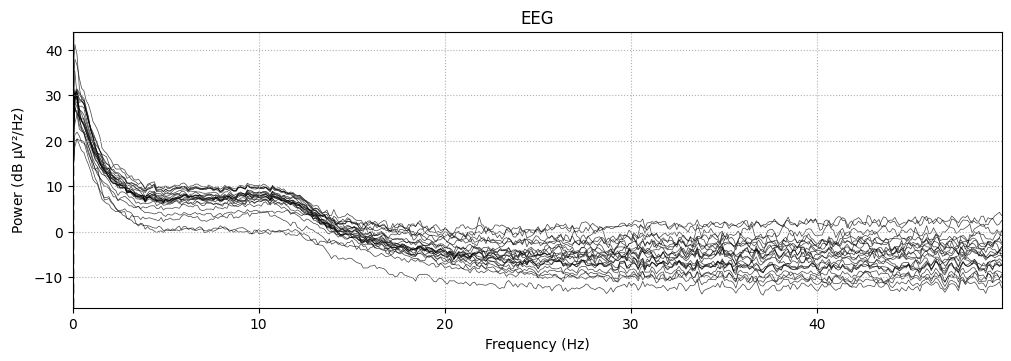

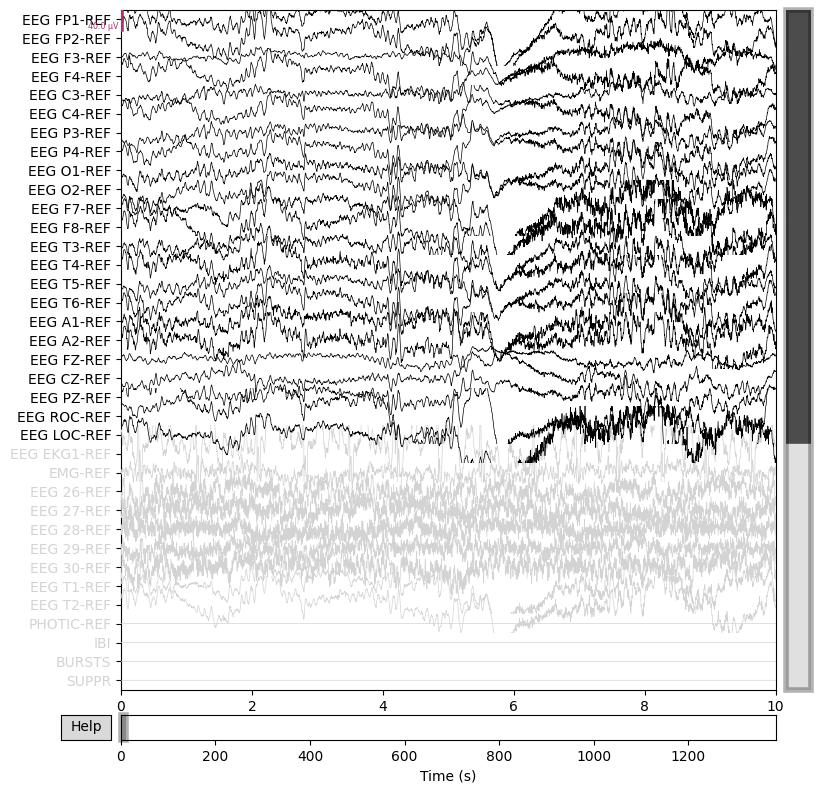

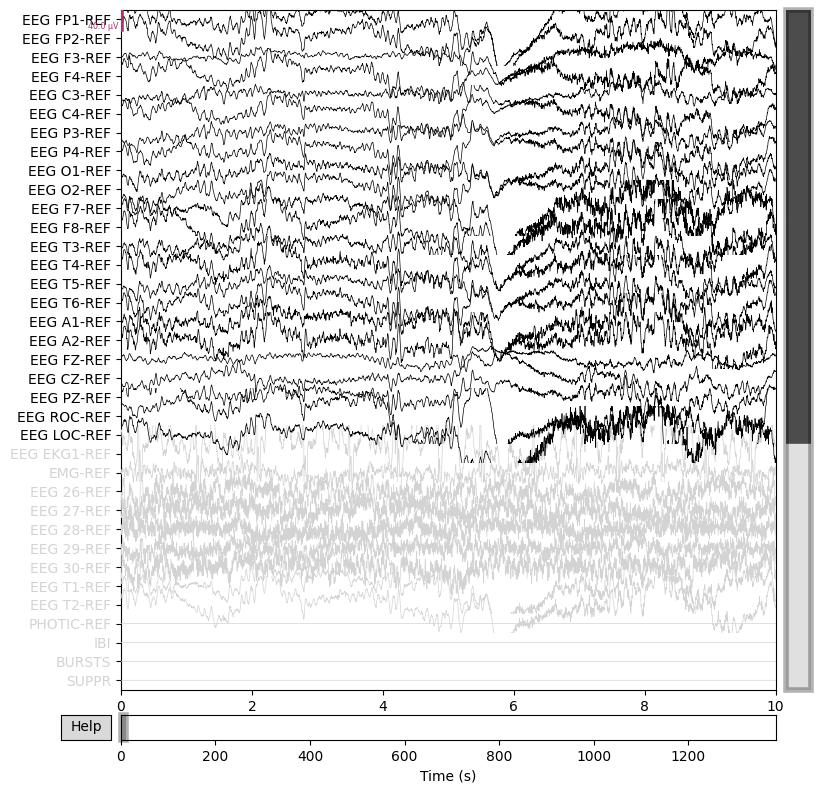

In [25]:
raw.info['bads'] = ['EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw.plot(n_channels=36)

In [4]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

NameError: name 'raw' is not defined

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


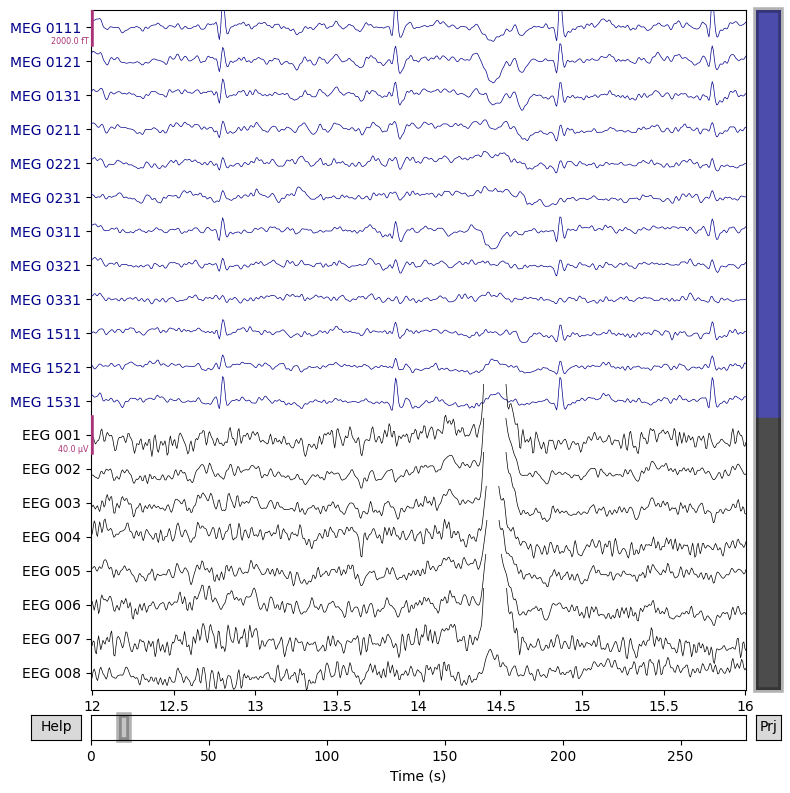

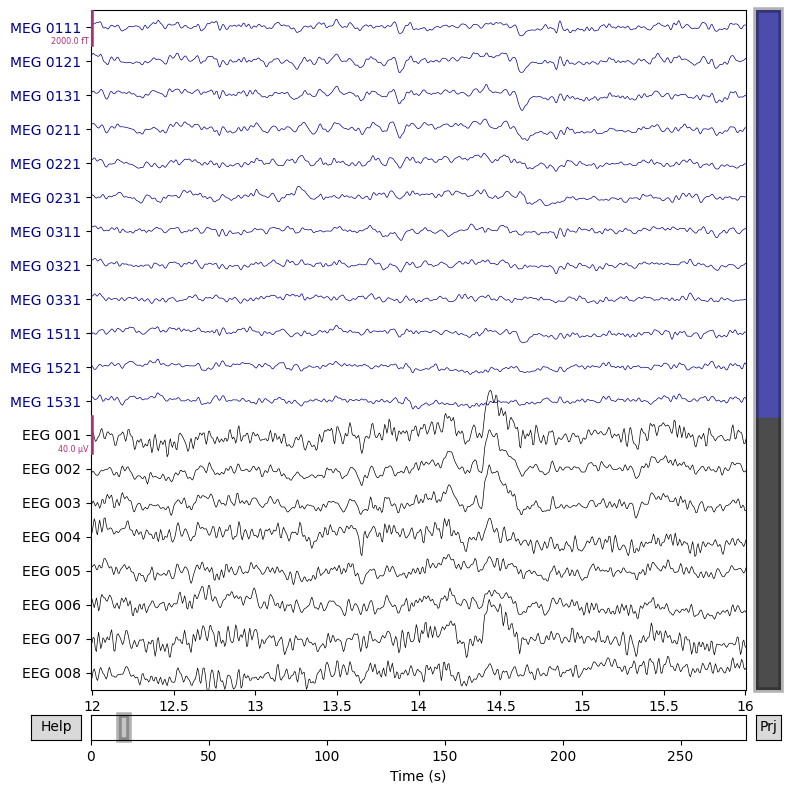

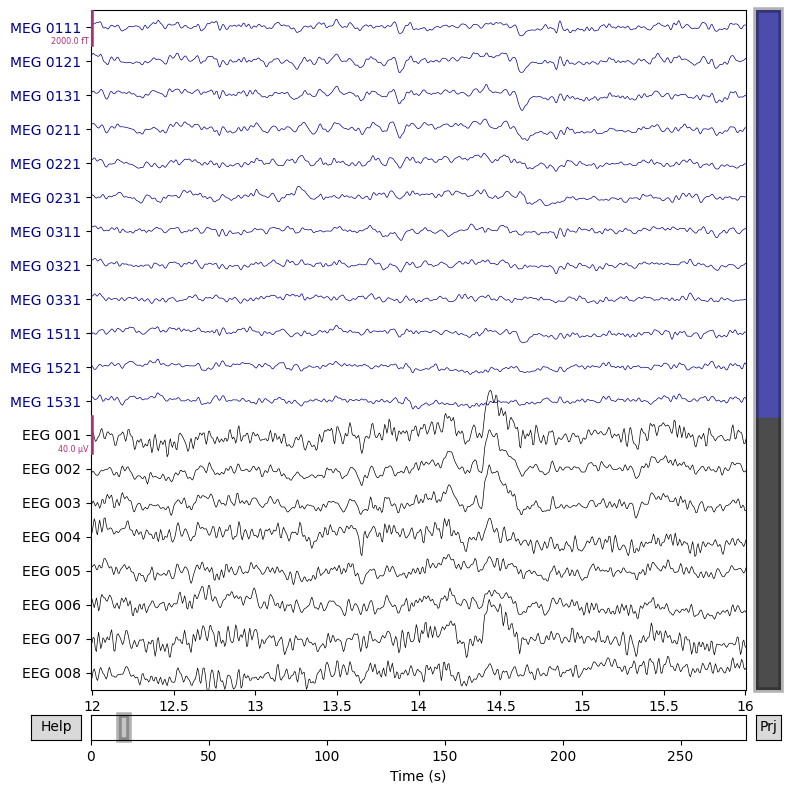

In [13]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = [
    "MEG 0111",
    "MEG 0121",
    "MEG 0131",
    "MEG 0211",
    "MEG 0221",
    "MEG 0231",
    "MEG 0311",
    "MEG 0321",
    "MEG 0331",
    "MEG 1511",
    "MEG 1521",
    "MEG 1531",
    "EEG 001",
    "EEG 002",
    "EEG 003",
    "EEG 004",
    "EEG 005",
    "EEG 006",
    "EEG 007",
    "EEG 008",
]
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

# Time Frequency Analysis

In [14]:
frequencies = np.arange(7, 30, 3)
power = aud_epochs.compute_tfr(
    "morlet", n_cycles=2, return_itc=False, freqs=frequencies, decim=3, average=True
)
power.plot(["MEG 1332"])

NameError: name 'aud_epochs' is not defined